In [1]:
from IPython.display import Image 

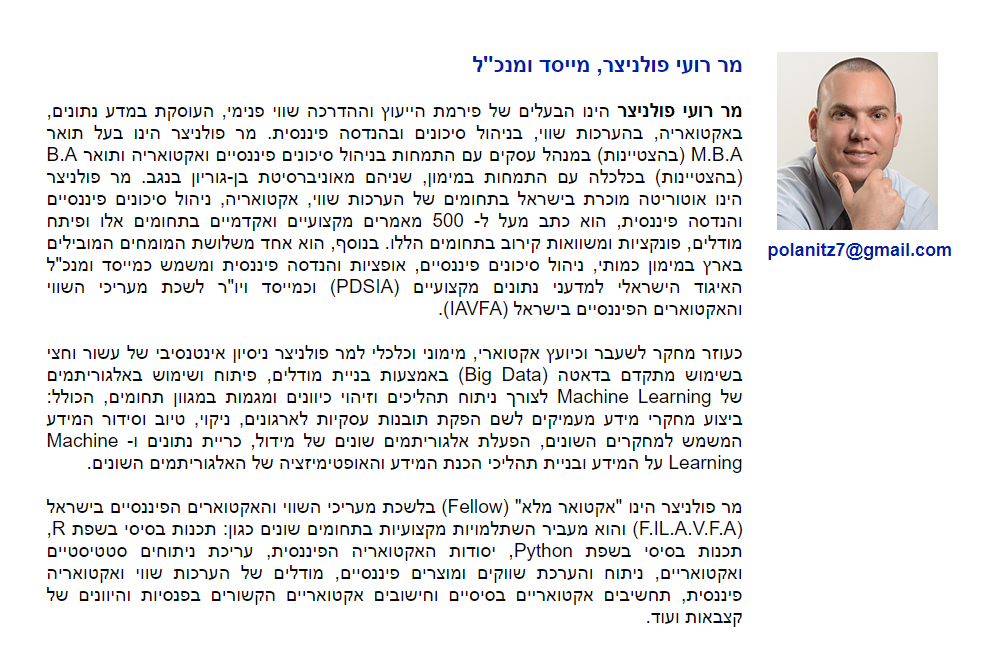

In [2]:
Image(filename='roi123.png')

# Linear Regression Lab

data set: USA_Housing.csv.

The data contains the following columns:

* 'Avg. Area Income': Avg. Income of residents of the city house is located in.
* 'Avg. Area House Age': Avg Age of Houses in same city
* 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
* 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at
* 'Address': Address for the house

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the file

In [4]:
data = pd.read_csv('USA_Housing.csv')

Use head, describe and info to get to know the data

In [5]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


use pairplot to find correlations

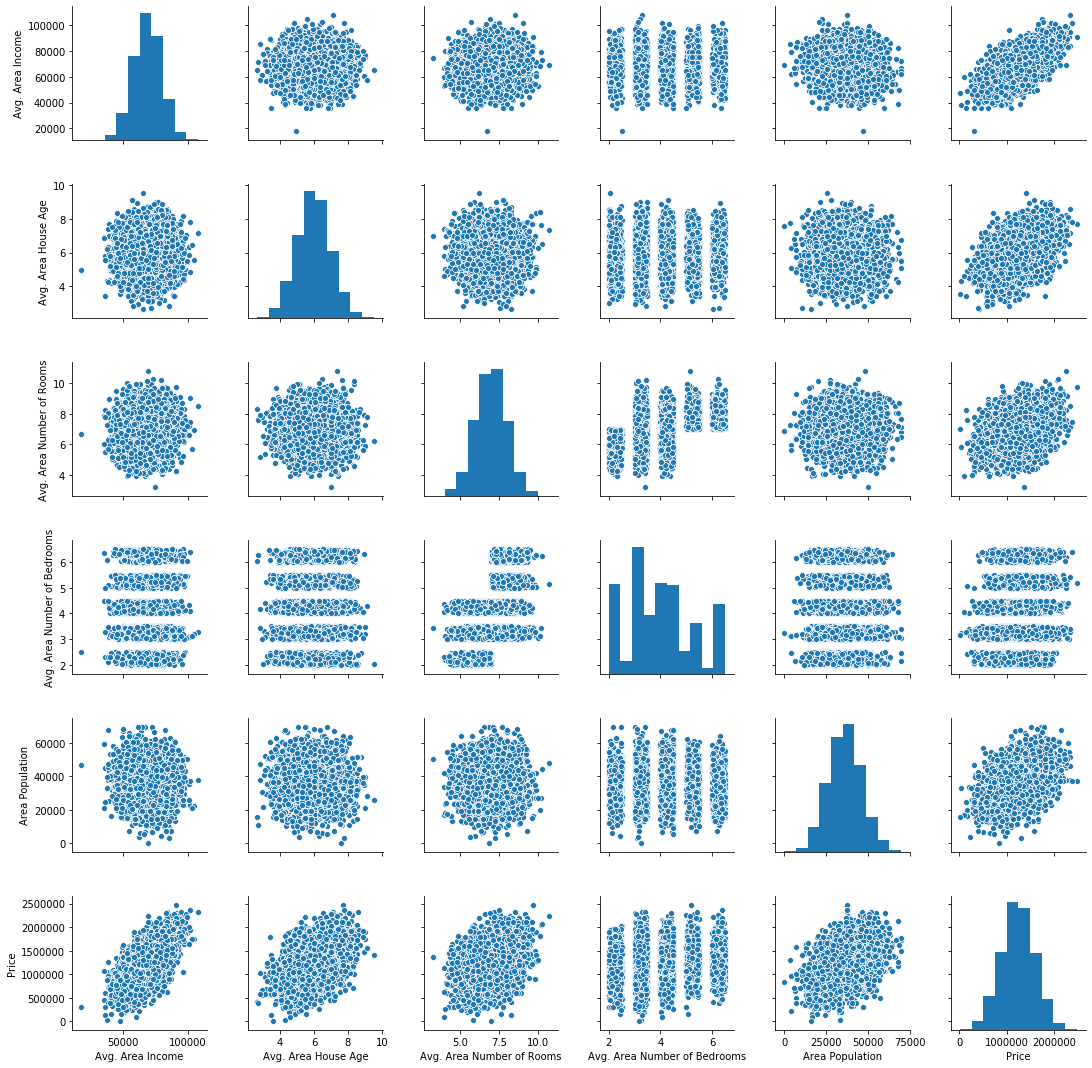

In [8]:
sns.pairplot(data)
plt.show()

Use distplot to find the pricing distribution

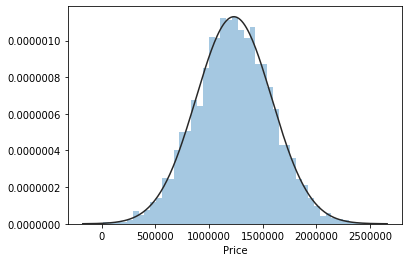

In [9]:
from scipy.stats import norm
ax = sns.distplot(data.Price, fit=norm, kde=False)

Display data correlation

In [10]:
# Create a correlation matrix between every pair of attributes
corr = data.corr()
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


Display correlation with heatmap

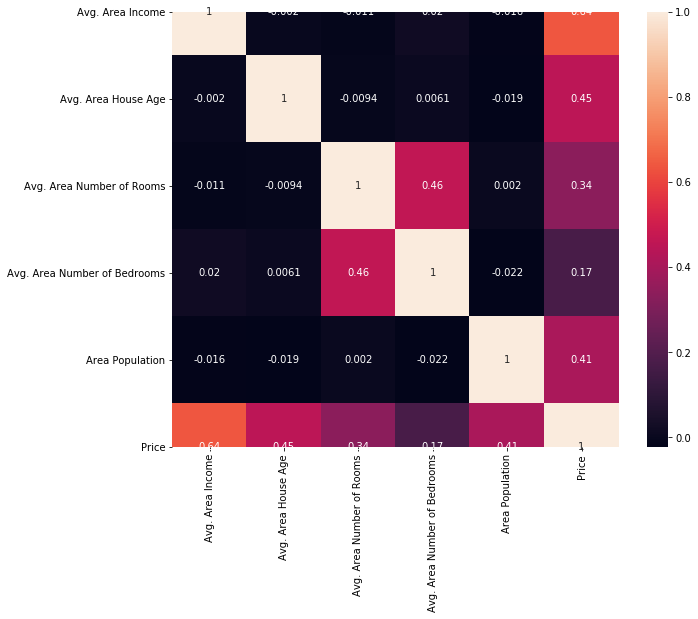

In [11]:
# Plot the correlation with seaborn
plt.subplots(figsize = (10, 8))
sns.heatmap(corr, annot = True)
plt.show()

# training
Create an X array that contains the features to train on, and a y array with the target variable - the Price column.<br> 
Remove any non valuable data

In [12]:
data_final=data.copy()
data_final.drop(['Address'], axis=1, inplace=True)

In [13]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
dtypes: float64(6)
memory usage: 234.5 KB


In [14]:
X = data_final.loc[:, data_final.columns != 'Price']
y = data_final.loc[:, data_final.columns == 'Price']

In [15]:
X.shape

(5000, 5)

In [16]:
y.shape

(5000, 1)

## Train Test Split

Use sklearn.model_selection.train_test_split to split the data (train/test)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (3500, 5)
Test data size: (1500, 5)


Create and Train the Model

In [18]:
import statsmodels.api as sm
from statsmodels import regression
# Add a constant to the independent value
X1 = sm.add_constant(X.astype(float))

# make regression model 
model = sm.OLS(y.astype(float), X1.astype(float))

# fit model and print results
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.119e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:55:23   Log-Likelihood:                -64714.
No. Observations:                5000   AIC:                         1.294e+05
Df Residuals:                    4994   BIC:                         1.295e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr=LinearRegression()
#fit the linear model on train data
lr_model=lr.fit(X_train,y_train)  

Display the model intercept and coefficient

In [21]:
lr.intercept_

array([-2644788.97737751])

In [22]:
lr.coef_

array([[2.16187374e+01, 1.66145180e+05, 1.21010577e+05, 1.76003780e+03,
        1.51647974e+01]])

## Testing Model

predict the test set 

In [23]:
#predict using the model
y_pred=lr.predict(X_test)  
#calculate R squared
print("R squared of the linear regression model:", "{:.2%}".format(lr.score(X_test, y_test)))

R squared of the linear regression model: 92.01%


So, in our model, 92.008% of the variability in Y can be explained using X. This is so exciting.

In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#calculate rmse
rmse=np.sqrt(mean_squared_error(y_test,y_pred))     
print('RMSE of the linear regression model:','{:,}'.format(round(rmse,0)))

RMSE of the linear regression model: 101,673.0


Our model was able to predict the value of every house in the test set within $101,673 of the real price.

Use scatter graph with the test and the predictions

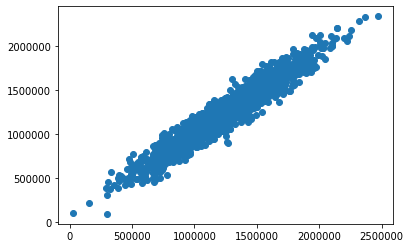

In [25]:
plt.scatter(y_test,y_pred)

In [26]:
df1 = pd.DataFrame(y_test)
df1.rename(columns={'Price': 'real value'}, inplace=True)

In [27]:
df1['predicted']=lr.predict(X_test)  

In [28]:
df1

,real value,predicted
398,8.942511e+05,9.696083e+05
3833,9.329794e+05,9.538682e+05
4836,9.207479e+05,9.075063e+05
4572,6.918549e+05,4.933253e+05
636,7.327332e+05,7.182212e+05
...,...,...
4554,1.900789e+06,1.708751e+06
4807,1.630435e+06,1.585405e+06
1073,1.372994e+06,1.423701e+06
2906,7.707706e+05,7.444009e+05


**Residual Histogram**<br>
Create distplot with 50 bins for the error (real value - predicted)

In [29]:
df1['residual']=df1['real value']-df1['predicted']

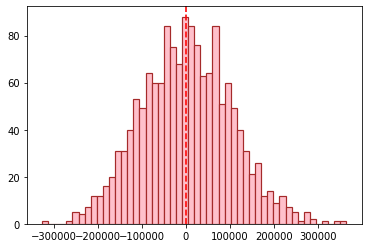

In [30]:
plt.hist(df1['residual'], bins=50, color="pink", edgecolor='brown', linewidth=1.2)
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6)
plt.show()

In [31]:
pd.DataFrame({'Count': [(df1['residual']<0).sum(), (df1['residual']==0).sum(), (df1['residual']>0).sum()]}, columns=['Count'], index=['Smaller', 'Zero', 'Larger'])

,Count
Smaller,756
Zero,0
Larger,744


Estimate the value of the following house:<br> 
* 6 rooms 
* 4 bedrooms
* Area income: 80000
* 5 years old
* Area population: 20000

In [32]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [33]:
len(X.columns)

5

In [34]:
new_data = np.array([80000, 5, 6, 4, 20000]).reshape(1,-1)
new_pred=lr.predict(new_data)
result = int(new_pred[0])
print("\033[1m The estimated value of that house is : $",'{:,}'.format(result))
print("\033[1m The expected error of the estimated value is: $",'{:,}'.format(round(rmse,0)))

 The estimated value of that house is : $ 951,835
 The expected error of the estimated value is: $ 101,673.0


In [35]:
# Do not stratify the label
houses = X_train

# Set a new dataset label variable
houses_labels = y_train

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from random import randint

# Our models performance holder
models_rmse = [] # Holds Models original RMSE
cvs_rmse_mean = [] # Holds the Cross Validation RMSE Mean
tests_rmse = [] # Holds the tests RMSE
tests_accuracy = [] # Holds the tests accuracy
models = [] # Holds the models name

def display_model_performance(model_name, model, houses = houses, labels = houses_labels,
                              models_rmse = models_rmse, cvs_rmse_mean = cvs_rmse_mean, tests_rmse = tests_rmse,
                              tests_accuracy = tests_accuracy, X_test = X_test,
                              y_test = y_test, cv = True):
    # Fit dataset in model
    model.fit(houses, labels)
    
    # Setup predictions
    predictions = model.predict(houses)
    
    # Get models performance
    model_mse = mean_squared_error(labels, predictions)
    model_rmse = np.sqrt(model_mse)
    
    # Cross validation
    cv_score = cross_val_score(model, houses, labels, scoring = "neg_mean_squared_error", cv = 10)
    cv_rmse = np.sqrt(-cv_score)
    cv_rmse_mean = cv_rmse.mean()
    
    print("RMSE: %.4f" %model_rmse)
    models_rmse.append(model_rmse)
    
    print("CV-RMSE: %.4f" %cv_rmse_mean)
    cvs_rmse_mean.append(cv_rmse_mean)
    
    print("--- Test Performance ---")
    
    X_test_prepared = X_test
    
    # Fit test dataset in model
    model.fit(X_test_prepared, y_test)
    
    # Setup test predictions
    test_predictions = model.predict(X_test_prepared)
    
    # Get models performance on test
    test_model_mse = mean_squared_error(y_test, test_predictions)
    test_model_rmse = np.sqrt(test_model_mse)
    print("RMSE: %.4f" %test_model_rmse)
    tests_rmse.append(test_model_rmse)
    
    # Tests accuracy
    test_accuracy = round(model.score(X_test_prepared, y_test) * 100, 2)
    print("Accuracy:", str(test_accuracy)+"%")
    tests_accuracy.append(test_accuracy)
    
    # Check how well model works on Test set by comparing prices
    start = randint(1, len(y_test))
    some_data = X_test.iloc[start:start + 7]
    some_labels = y_test.iloc[start:start + 7]
    some_data_prepared = some_data
    print("Predictions:\t", model.predict(some_data_prepared))
    print("Labels:\t\t", list(some_labels))
    
    models.append(model_name)
    
    # Preview plot
    plt.scatter(houses_labels, model.predict(houses))
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "k--")
    plt.show()
    
    print("------- Test -------")
    plt.scatter(y_test, model.predict(X_test_prepared))
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot(x_lim, y_lim, "k--")
    plt.show()

# Linear Regression

RMSE: 100848.5665
CV-RMSE: 100949.9602
--- Test Performance ---
RMSE: 101632.2146
Accuracy: 92.01%
Predictions:	 [[1331224.01119807]
 [1371719.41774938]
 [1093260.26960603]
 [1008288.99940242]
 [1510359.16008952]
 [1073602.98484421]
 [ 769577.82672916]]
Labels:		 ['Price']


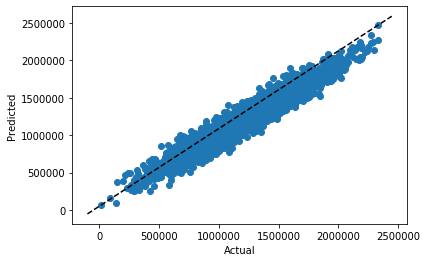

------- Test -------


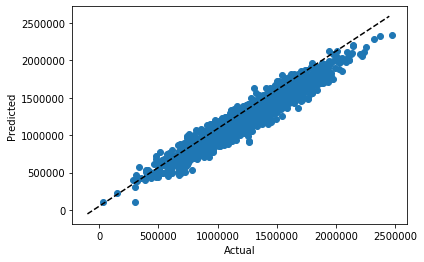

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize = True)
display_model_performance("Linear Regression", lin_reg)

# Decision Tree Regression

RMSE: 0.0000
CV-RMSE: 176613.9593
--- Test Performance ---
RMSE: 0.0000
Accuracy: 100.0%
Predictions:	 [1795445.89770118 1039794.76744782 1331897.45684096  962028.70076464
  885204.97865833 1170573.76986364  849180.84599371]
Labels:		 ['Price']


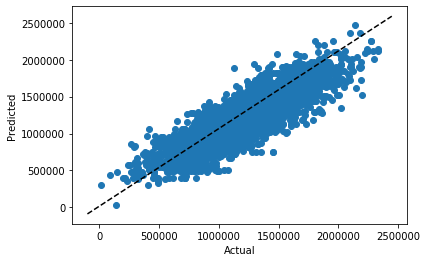

------- Test -------


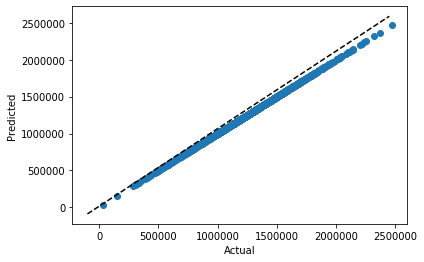

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
display_model_performance("Decision Tree Regression", tree_reg)

# Random Forest Regression

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

RMSE: 54254.3757
CV-RMSE: 128548.5346
--- Test Performance ---
RMSE: 57990.6115
Accuracy: 97.4%
Predictions:	 [1146397.06918887 1104218.69828861 1339999.55483643 1822467.8797582
 1442409.4694266  1490888.05340567 1168539.07856861]
Labels:		 ['Price']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


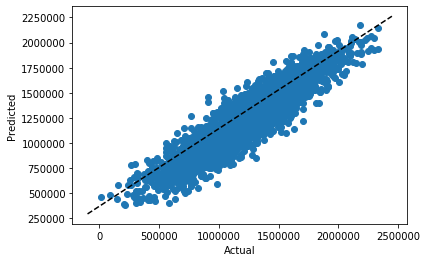

------- Test -------


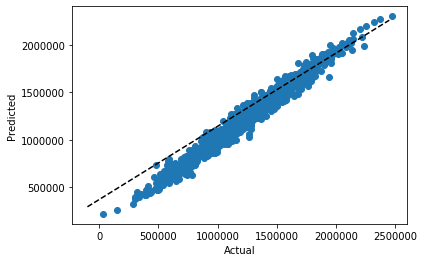

In [39]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
display_model_performance("Random Forest Regression", forest_reg)

# Ridge Regression

RMSE: 198169.4252
CV-RMSE: 198161.2179
--- Test Performance ---
RMSE: 198237.7995
Accuracy: 69.62%
Predictions:	 [[1318577.98815227]
 [1358099.30837471]
 [1042873.53317843]
 [ 896969.22980695]
 [1160756.43729678]
 [1211664.34984173]
 [ 944606.37734753]]
Labels:		 ['Price']


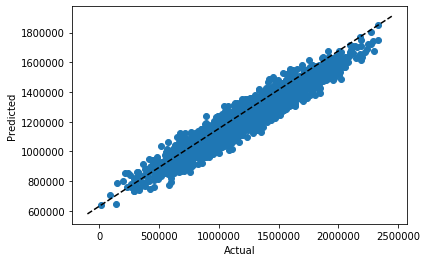

------- Test -------


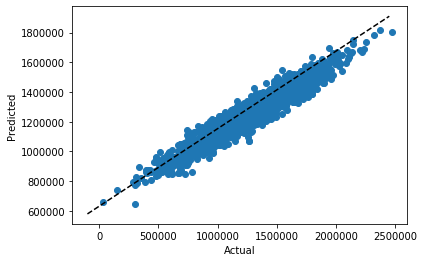

In [40]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(normalize = True)
display_model_performance("Ridge Regression", ridge_reg)

# Lasso Regression

RMSE: 100848.6432
CV-RMSE: 100950.1003
--- Test Performance ---
RMSE: 101632.2461
Accuracy: 92.01%
Predictions:	 [1391749.47433099 1090710.16928069 1810146.63653628 1208707.57490981
 1786599.18184342 1024006.65341188 1347513.78127426]
Labels:		 ['Price']


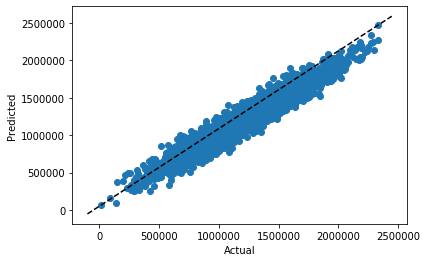

------- Test -------


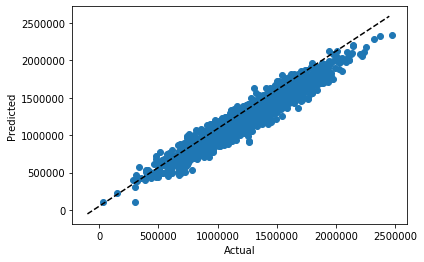

In [41]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(normalize = True)
display_model_performance("Lasso Regression", lasso_reg)

# Elastic Net Regression

RMSE: 122028.1270
CV-RMSE: 122209.6395
--- Test Performance ---
RMSE: 122297.5028
Accuracy: 88.44%
Predictions:	 [1348027.4097533   991222.29045831 1114335.98649175 1120317.77811231
 1150619.69813472 1131346.75423346 1516455.68943944]
Labels:		 ['Price']


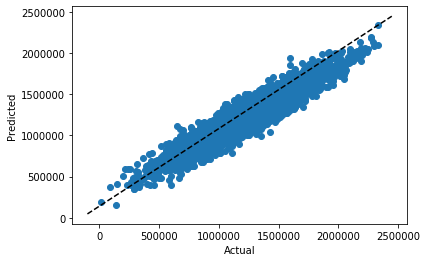

------- Test -------


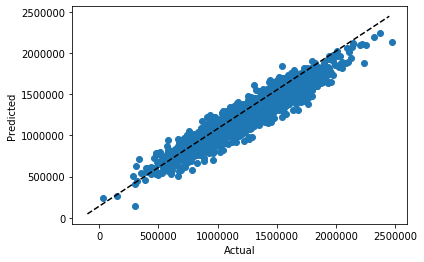

In [42]:
from sklearn.linear_model import ElasticNet

net_reg = ElasticNet()
display_model_performance("Elastic Net Regression", net_reg)

# AdaBoost Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

RMSE: 133888.2756
CV-RMSE: 142807.0252
--- Test Performance ---


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 135535.1870
Accuracy: 85.8%
Predictions:	 [1456249.72600684 1051893.35064212 1704892.27909635 1467980.6364647
  678258.33898305 1245385.75724052 1128457.5577912 ]
Labels:		 ['Price']


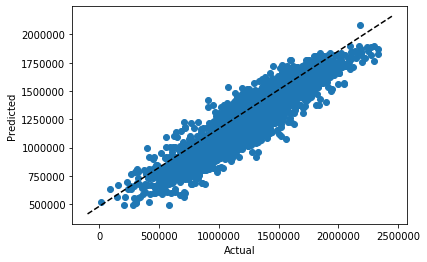

------- Test -------


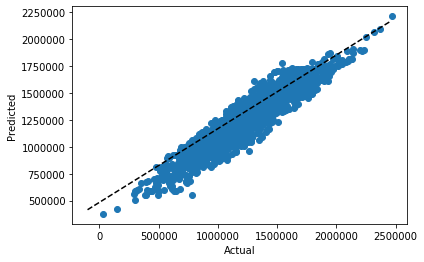

In [43]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators = 100)
display_model_performance("AdaBoost Regression", ada_reg)

# GradientBoosting Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

RMSE: 142675.2485
CV-RMSE: 149338.1282
--- Test Performance ---


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 137384.9999
Accuracy: 85.41%
Predictions:	 [1296852.33486105 1224285.8668005  1048807.06522751  949482.69870466
 1717073.46895366  949865.35627103 1439321.41610015]
Labels:		 ['Price']


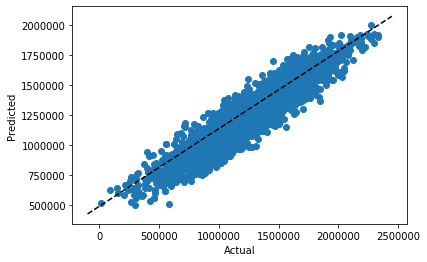

------- Test -------


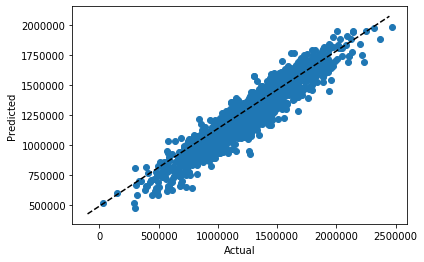

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,
                                     max_depth = 1, random_state = 42, loss = 'ls')
display_model_performance("GradientBoosting Regression", grad_reg)

# K Nearest Neighbors Regression

RMSE: 162852.4153
CV-RMSE: 281863.9839
--- Test Performance ---
RMSE: 166306.5707
Accuracy: 78.62%
Predictions:	 [[1095203.63328357]
 [1572533.0901034 ]
 [1685183.09884813]
 [1492695.04125701]
 [1308295.40052055]
 [ 785904.80244397]
 [1106095.78527974]]
Labels:		 ['Price']


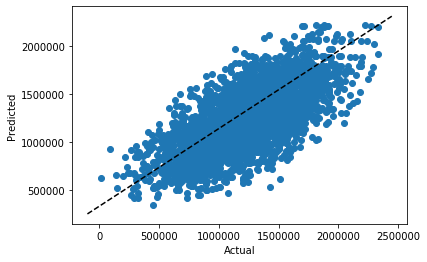

------- Test -------


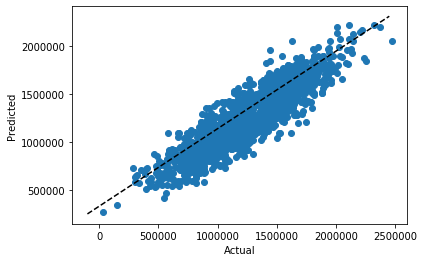

In [45]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)
display_model_performance("KNeighbors Regression", neigh)

# Compare Models Performance

In [46]:
compare_models = pd.DataFrame({ "Algorithms": models, "Models RMSE": models_rmse, "CV RMSE Mean": cvs_rmse_mean,
                              "Tests RMSE": tests_rmse, "Tests Accuracy": tests_accuracy })
compare_models.sort_values(by = "Tests Accuracy", ascending = False)

,Algorithms,Models RMSE,CV RMSE Mean,Tests RMSE,Tests Accuracy
1,Decision Tree Regression,0.000000,176613.959315,0.000000,100.00
2,Random Forest Regression,54254.375714,128548.534592,57990.611488,97.40
0,Linear Regression,100848.566455,100949.960174,101632.214565,92.01
4,Lasso Regression,100848.643210,100950.100322,101632.246062,92.01
5,Elastic Net Regression,122028.127009,122209.639491,122297.502816,88.44
6,AdaBoost Regression,133888.275614,142807.025176,135535.186984,85.80
7,GradientBoosting Regression,142675.248537,149338.128202,137384.999873,85.41
8,KNeighbors Regression,162852.415266,281863.983942,166306.570726,78.62
3,Ridge Regression,198169.425195,198161.217895,198237.799481,69.62


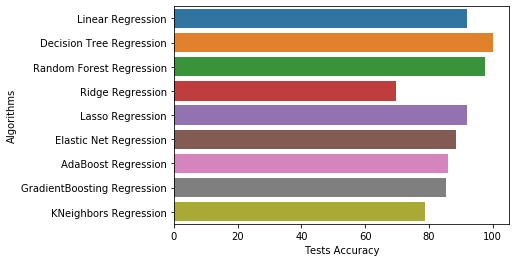

In [47]:
sns.barplot(x = "Tests Accuracy", y = "Algorithms", data = compare_models)
plt.show()

# Your Turn!

Hopefully, this post gives you a good idea of what a machine learning regression project looks like. As you can see, much of the work is in the data wrangling and the preparation steps, and these procedures consume most of the time spent on machine learning.

Now it’s time to get out there and start exploring and cleaning your data. Try two or three algorithms, and let me know how it goes.

I would be pleased to receive feedback or questions on any of the above.